In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [15]:
!pip install prophet


In [16]:
import pandas as pd
import matplotlib.pyplot as plt
from prophet import Prophet


In [17]:
# Check file name first
import os
os.listdir('/kaggle/input/bitcoin-historical-data-2014-2025-yahoo-finance')


['bitcoin_history.csv']

In [18]:
df = pd.read_csv('/kaggle/input/bitcoin-historical-data-2014-2025-yahoo-finance/bitcoin_history.csv')

# Preview the data
df.head()


,Date,Open,High,Low,Close,Adj Close,Volume
0,"Feb 20, 2025","96,628.40","98,722.29","96,481.41","98,347.95","98,347.95","31,327,236,096"
1,"Feb 19, 2025","95,532.53","96,855.59","95,011.97","96,635.61","96,635.61","28,990,872,862"
2,"Feb 18, 2025","95,773.81","96,695.38","93,388.84","95,539.55","95,539.55","37,325,720,482"
3,"Feb 17, 2025","96,179.01","97,032.23","95,243.55","95,773.38","95,773.38","27,336,550,690"
4,"Feb 16, 2025","97,580.49","97,725.59","96,060.98","96,175.03","96,175.03","16,536,755,396"


In [19]:
# Convert date column
df['Date'] = pd.to_datetime(df['Date'])

# Keep only the date and close price
df = df[['Date', 'Close']]
df.columns = ['ds', 'y']  # Prophet needs 'ds' (date) and 'y' (value)

df.head()


,ds,y
0,2025-02-20,"98,347.95"
1,2025-02-19,"96,635.61"
2,2025-02-18,"95,539.55"
3,2025-02-17,"95,773.38"
4,2025-02-16,"96,175.03"


In [23]:
# Load data
df = pd.read_csv('/kaggle/input/bitcoin-historical-data-2014-2025-yahoo-finance/bitcoin_history.csv')

# Convert 'Date' column to datetime
df['Date'] = pd.to_datetime(df['Date'])

# Remove commas and convert 'Close' to float
df['Close'] = df['Close'].str.replace(',', '').astype(float)

# Keep only Date and Close columns
df = df[['Date', 'Close']]
df.columns = ['ds', 'y']  # Prophet format
print(df.dtypes)
print(df.head())


ds    datetime64[ns]
y            float64
dtype: object
          ds         y
0 2025-02-20  98347.95
1 2025-02-19  96635.61
2 2025-02-18  95539.55
3 2025-02-17  95773.38
4 2025-02-16  96175.03


In [24]:
from prophet import Prophet

model = Prophet()
model.fit(df)


09:36:17 - cmdstanpy - INFO - Chain [1] start processing
09:36:18 - cmdstanpy - INFO - Chain [1] done processing


In [28]:
future = model.make_future_dataframe(periods=365)
forecast = model.predict(future)


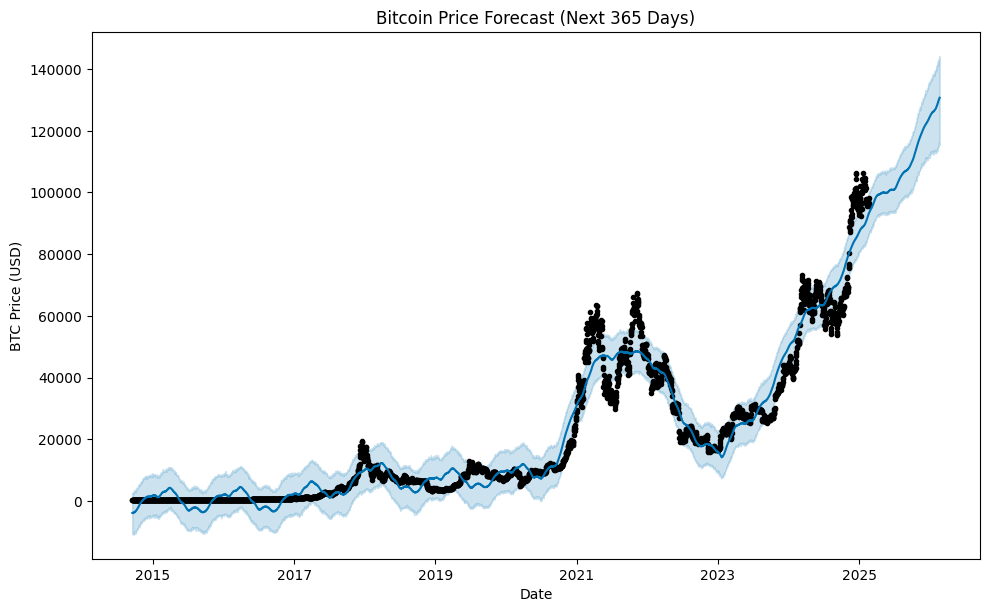

In [29]:
model.plot(forecast)
plt.title("Bitcoin Price Forecast (Next 365 Days)")
plt.xlabel("Date")
plt.ylabel("BTC Price (USD)")
plt.grid()
plt.show()


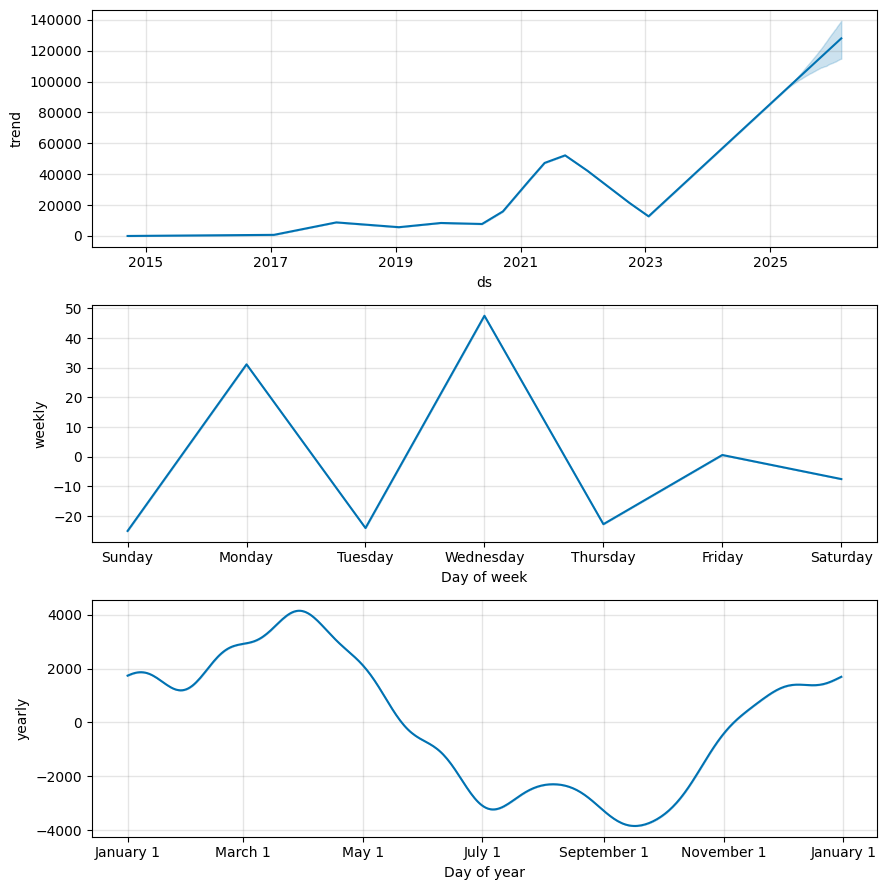

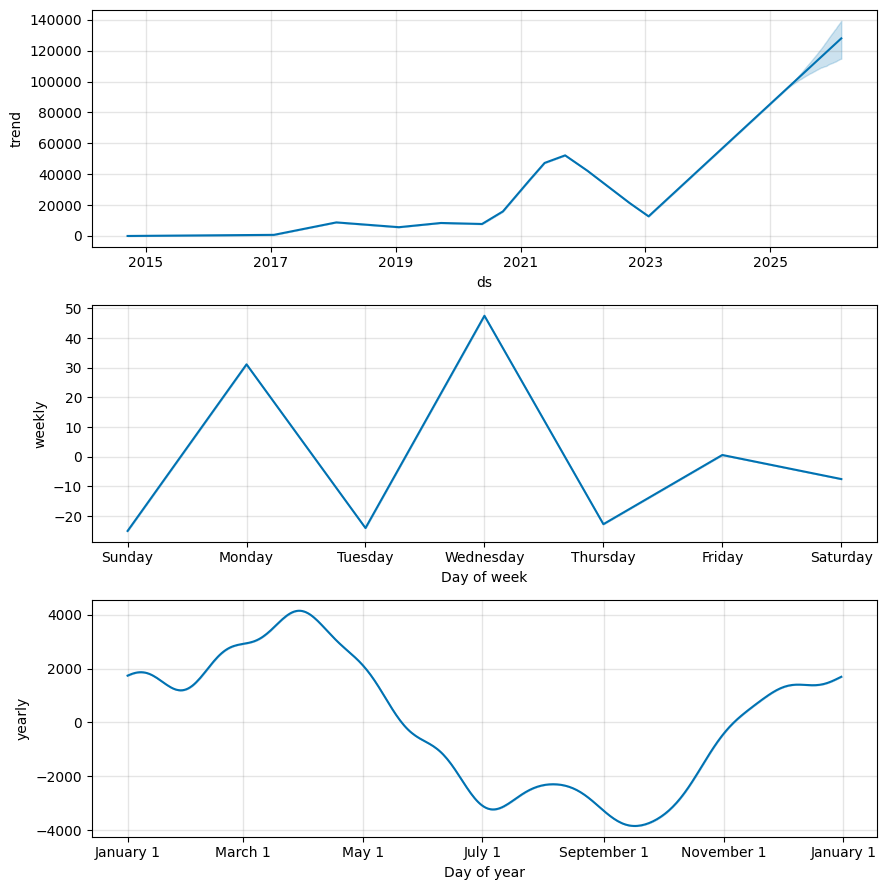

In [30]:
model.plot_components(forecast)


In [31]:
# Train = all data except last 90 days
train_df = df[:-90]
test_df = df[-90:]

# Train Prophet on training data
model = Prophet()
model.fit(train_df)

# Make future df for prediction (same number of days as test set)
future = model.make_future_dataframe(periods=90)
forecast = model.predict(future)

# Get only the last 90 days of prediction to match test set
forecast_test = forecast[['ds', 'yhat']].tail(90).reset_index(drop=True)
test_df = test_df.reset_index(drop=True)


09:40:30 - cmdstanpy - INFO - Chain [1] start processing
09:40:32 - cmdstanpy - INFO - Chain [1] done processing


In [32]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

mae = mean_absolute_error(test_df['y'], forecast_test['yhat'])
rmse = np.sqrt(mean_squared_error(test_df['y'], forecast_test['yhat']))

print(f"📉 MAE: {mae:.2f}")
print(f"📉 RMSE: {rmse:.2f}")


📉 MAE: 98421.97
📉 RMSE: 98447.40
